# Absenteeism Predictions using different Machine Learning Models

## Learning Models for predicting absenteeism at workplace

## Building Random Forset Classifier

**Splitting data to train and test set**

In [11]:
X = df.iloc[:, 0:20].values
y = df.iloc[:, 20].values

In [12]:
X

array([[ 11,  26,   7, ...,  90, 172,  30],
       [ 36,   0,   7, ...,  98, 178,  31],
       [  3,  23,   7, ...,  89, 170,  31],
       ...,
       [  4,   0,   0, ...,  98, 170,  34],
       [  8,   0,   0, ..., 100, 170,  35],
       [ 35,   0,   0, ...,  77, 175,  25]], dtype=int64)

In [13]:
y

array([  4,   0,   2,   4,   2,   2,   8,   4,  40,   8,   8,   8,   8,
         1,   4,   8,   8,   8,   2,   8,   1,  40,   4,   8,   7,   1,
         4,   8,   2,   8,   8,   4,   8,   2,   1,   8,   4,   8,   4,
         2,   4,   4,   8,   2,   3,   3,   4,   8,  32,   0,   0,   2,
         2,   0,   0,   3,   3,   0,   1,   3,   4,   3,   3,   0,   1,
         3,   3,   2,   2,   5,   8,   3,  16,   8,   2,   8,   1,   3,
         1,   1,   8,   8,   5,  32,   8,  40,   8,   3,   8,   3,   4,
         1,   3,  24,   3,   1,  64,   2,   8,   2,   8,  56,   8,   3,
         3,   2,   2,   8,   2,   1,   1,   1,   8,   2,   2,   2,   1,
         2,   2,   2,   2,   2,   2,   8,   8,   0,   1,   3,   1,   8,
         8,   2,   8,   2,   8,   8,   8,   2,   2,   1,   8,   3,   8,
         1,   1,   8,   2,   8,   3,   8,   8,   8,   8,   3,  40,  40,
        16,  16,   8,   8,   8,   4,   1,   8,  24,   2,   8,   1,   8,
        16,   3,  16,   2,   3,   1,   1,   1,   1,  24,   1,   

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Feature Scaling**

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Training the Algorithm**

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=700,max_depth=7, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred2=clf.predict(X_train)

**Evaluating the algorithm**

In [17]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 47.16981132075472


**Printing the accuracy of test and train data**

In [18]:
print("Random Forest Accuracy on test data:",metrics.accuracy_score(y_test, y_pred))

Random Forest Accuracy on test data: 0.4716981132075472


In [19]:
print("Random Forest Accuracy on training data:",metrics.accuracy_score(y_train, y_pred2))

Random Forest Accuracy on training data: 0.7267206477732794


**Plotting the test and train accuracies**

In [20]:
a=metrics.accuracy_score(y_test, y_pred)
b=metrics.accuracy_score(y_train, y_pred2)

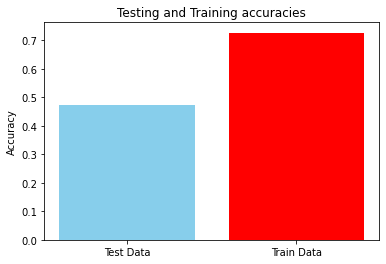

In [21]:
x='Test Data' 
y='Train Data'
c=[x,y] 
d=[a,b]
plt.bar(c,d,color=['skyblue','red'])
plt.ylabel('Accuracy')
plt.title('Testing and Training accuracies')
plt.show()

# Decision Tree Classifier

In [31]:
#Traing the Algorithm 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred2=clf.predict(X_train)

In [34]:
# Predicting test set
y_pred = dt.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dt.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.37


In [38]:
training_score=dt.score(X_train,y_train)
training_score

0.9627659574468085

In [37]:
testing_score=dt.score(X_test,y_test)
testing_score

0.3732394366197183

# Logistic Regression

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [88]:
#splitting train and test data 
train,test = train_test_split(df,test_size = 0.3 ,random_state = 0)

In [90]:
#splitting train and test data 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
testing_score=logreg.score(X_test,y_test)
testing_score

0.4507042253521127

In [92]:
training_score=logreg.score(X_train,y_train)
training_score

0.48936170212765956

## Building Artificial Neural Network

### Create Training and Testing Datasets

The output class is reduced, as it increases the network’s probability of finding the right output class.SThey are reduced from a possible 120 to 2. A new column called class has been added to the original dataset and the 2 subranges for the values of
the output neurons are as follows:


In [22]:
table = pd.DataFrame({'Absenteeism Time (in hours)': ['Between 0 - 50', 'More than 50'], 'Class': [0,1]})
table


,Absenteeism Time (in hours),Class
0,Between 0 - 50,0
1,More than 50,1


Reading the new dataset after adding class column

In [37]:
df1=pd.read_csv("new.csv")

**Dropping ID column**

In [38]:
df1=df1.drop(['ID'],axis=1)

In [39]:
y = df1.Class.values
X = df1.drop(['Class'], axis=1)

In [40]:
X

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,14,7,3,1,289,36,13,33,264604,93,0,1,2,1,0,1,90,172,30,8
702,11,7,3,1,235,11,14,37,264604,93,0,3,1,0,0,1,88,172,29,4
703,0,0,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,98,170,34,0
704,0,0,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,100,170,35,0


In [41]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0, test_size = 0.2)

In [43]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()                         
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [44]:
X_train_scaled

array([[0.35714286, 0.5       , 1.        , ..., 0.21212121, 0.21052632,
        0.06666667],
       [0.96428571, 0.16666667, 0.5       , ..., 0.21212121, 0.63157895,
        0.025     ],
       [0.03571429, 0.91666667, 0.        , ..., 0.33333333, 0.10526316,
        0.06666667],
       ...,
       [0.46428571, 0.33333333, 0.75      , ..., 0.12121212, 0.31578947,
        0.06666667],
       [0.64285714, 0.08333333, 0.25      , ..., 1.        , 0.31578947,
        0.06666667],
       [1.        , 0.5       , 0.75      , ..., 0.24242424, 0.31578947,
        0.01666667]])

In [45]:
from tensorflow import keras

**Building and Training the Neural Network**

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [48]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [49]:
history=model.fit(X_train_scaled, y_train, epochs=20, batch_size=10,validation_data=(X_test_scaled, y_test))

Epoch 1/20
57/57 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.9291 - val_loss: 0.2694 - val_accuracy: 0.9789
Epoch 2/20
57/57 [==============================] - 0s 1ms/step - loss: 0.1603 - accuracy: 0.9805 - val_loss: 0.1198 - val_accuracy: 0.9789
Epoch 3/20
57/57 [==============================] - 0s 972us/step - loss: 0.1019 - accuracy: 0.9805 - val_loss: 0.1087 - val_accuracy: 0.9789
Epoch 4/20
57/57 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.9805 - val_loss: 0.1037 - val_accuracy: 0.9789
Epoch 5/20
57/57 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9805 - val_loss: 0.0991 - val_accuracy: 0.9789
Epoch 6/20
57/57 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9805 - val_loss: 0.0951 - val_accuracy: 0.9789
Epoch 7/20
57/57 [==============================] - 0s 1ms/step - loss: 0.0821 - accuracy: 0.9805 - val_loss: 0.0903 - val_accuracy: 0.9789
Epoch 8/20
57/57 [

In [50]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)

5/5 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.9859
Test accuracy: 0.98591548204422


**Plotting the model accuracy and model loss**

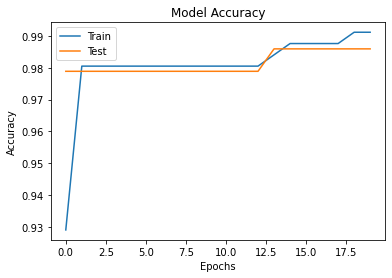

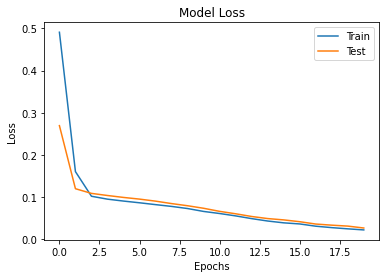

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

# Plot the Loss function vs. number of Epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

# Classification Analysis - SVM(linear,polynomial,RBF)

In [93]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import sklearn.metrics as sk
print('Linear Model',end='\n')
lsvclassifier = SVC(kernel='linear')
lsvclassifier.fit(X_train, y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = lsvclassifier, X = X_train, y = y_train, cv = 5)
mean_svm_linear=accuracies.mean()
std_svm_linear=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_linear*100,end='\n')
print('Standard deviation of Accuracies',std_svm_linear*100,end='\n')

#Predict SVM
y_predl = lsvclassifier.predict(X_test)
print('Linear Model',end='\n')
lsvclassifier = SVC(kernel='linear')
lsvclassifier.fit(X_train, y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = lsvclassifier, X = X_train, y = y_train, cv = 5)
mean_svm_linear=accuracies.mean()
std_svm_linear=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_linear*100,end='\n')
print('Standard deviation of Accuracies',std_svm_linear*100,end='\n')

#Predict SVM
y_predl = lsvclassifier.predict(X_test)


Linear Model
After 5 fold cross validation:

C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)



Mean of Accuracies:  46.88870761793166
Standard deviation of Accuracies 5.507790850917688
Linear Model


C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


After 5 fold cross validation:
Mean of Accuracies:  46.88870761793166
Standard deviation of Accuracies 5.507790850917688


In [94]:
#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y_test,y_predl))
print('Accuracy: ',sk.accuracy_score(y_test, y_predl, normalize=True, sample_weight=None))

Test Output:
Confusion Matrix:
[[14  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  1  7  1  0  9  0  0  0  0  0  0]
 [ 0  2 18  6  0  7  0  0  0  0  0  0]
 [ 0  1  7  5  0  6  0  0  0  0  0  0]
 [ 0  1  5  1  3  6  0  0  0  0  0  0]
 [ 0  2  5  1  0 24  0  0  0  0  0  0]
 [ 0  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.14      0.06      0.08        18
           2       0.42      0.55      0.47        33
           3       0.36      0.26      0.30        19
           4       1.00      0.19      0.32        16
           8       0.39      0.75      0.52        32
          16       0.00      0.00      0.00         2
          24       0.00      0.00      0.00 

C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [95]:
#Polynomial SVM
print('Polynomial Model',end='\n')
psvclassifier = SVC(kernel='poly')
psvclassifier.fit(X_train, y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = psvclassifier, X = X_train, y = y_train, cv = 5)
mean_svm_poly=accuracies.mean()
std_svm_poly=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_poly*100,end='\n')
print('Standard deviation of Accuracies',std_svm_poly*100,end='\n')

#Predict SVM
y_predp = psvclassifier.predict(X_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y_test,y_predp))
print('Classification Report:')
print(sk.classification_report(y_test,y_predp))
print('Accuracy: ',sk.accuracy_score(y_test, y_predp, normalize=True, sample_weight=None))

Polynomial Model
After 5 fold cross validation:
Mean of Accuracies:  31.10012818968395
Standard deviation of Accuracies 1.4847105609237132
Test Output:
Confusion Matrix:
[[ 0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        16
           8 

C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamm

In [96]:
#RBF SVM
print('RBF Model',end='\n')
rsvclassifier = SVC(kernel='rbf')
rsvclassifier.fit(X_train, y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = rsvclassifier, X = X_train, y = y_train, cv = 5)
mean_svm_rbf=accuracies.mean()
std_svm_rbf=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_rbf*100,end='\n')
print('Standard deviation of Accuracies',std_svm_rbf*100,end='\n')

#Predict SVM
y_predr = rsvclassifier.predict(X_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y_test,y_predr))
print('Classification Report:')
print(sk.classification_report(y_test,y_predr))
print('Accuracy: ',sk.accuracy_score(y_test, y_predr, normalize=True, sample_weight=None))

RBF Model
After 5 fold cross validation:

C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamm


Mean of Accuracies:  40.93754420426018
Standard deviation of Accuracies 3.4541902873673656
Test Output:
Confusion Matrix:
[[14  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  6  0  0 12  0  0  0  0  0  0]
 [ 0  0 14  0  0 19  0  0  0  0  0  0]
 [ 0  0  6  0  0 13  0  0  0  0  0  0]
 [ 0  0  4  0  0 12  0  0  0  0  0  0]
 [ 0  0  5  0  0 27  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.00      0.00      0.00        18
           2       0.40      0.42      0.41        33
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        16
           8       0.29      0.84      0.43        32
      

C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
